# Predicting Credit Card Approval for a Bank

1. In today's world, data-driven decision-making is crucial for financial institutions like banks. Predicting credit card approval is not only important for reducing risks associated with lending but also for providing better financial services to customers. 
2. A more accurate credit assessment process can lead to fewer defaults, increased profitability, and improved customer satisfaction. Additionally, in the context of India, where credit access is expanding rapidly, ensuring that credit cards are extended to creditworthy customers is vital for the growth and stability of the banking sector.

- **Gap in Knowledge:** The traditional credit assessment process, while effective, may not utilize the full potential of data science and machine learning techniques. The proposed method aims to bridge this gap by leveraging advanced data analytics and machine learning to enhance credit assessment in the Indian banking sector.

# Initial Hypotheses

**Hypothesis 1**: Customer income, education level, and employment status are critical factors influencing credit card approval decisions.

**Hypothesis 2**: Applicants with a higher number of family members may have a higher likelihood of credit card approval.

**Hypothesis 3**: Feature engineering techniques and feature scaling, will be relevant for preparing the dataset for machine learning.

**Hypothesis 4**: Exploratory Data Analysis (EDA) will reveal patterns and relationships within the dataset that can help improve credit card approval predictions.


# Data Analysis Approach

- **Data Preprocessing:** Handle missing values, perform one-hot encoding for categorical variables, and scale numerical features.
- **Exploratory Data Analysis (EDA):** Visualize and analyze the dataset to identify patterns and correlations.
- **Feature Selection:** Identify the most important features that impact credit card approval using statistical tests and feature importance scores from machine learning models.
- **Model Building:** Train machine learning models, including logistic regression, decision trees, random forests, and neural networks, to predict credit card approval.
- **Model Evaluation:** Use appropriate metrics (e.g., accuracy, precision, recall, F1-score) to evaluate model performance.
- **Model Interpretation:** Interpret the results to understand which factors influence credit card approval the most.
- **Hyperparameter Tuning:** Optimize hyperparameters for the best-performing model.
- **Model Deployment:** If applicable, deploy the model in a real-world environment for ongoing credit card approval decisions.
Justification: This approach ensures a comprehensive analysis of the dataset, including both traditional credit scoring methods and machine learning techniques. EDA will help us understand the data's underlying structure and relationships, and machine learning models will provide predictive accuracy.


# Machine Learning Approach

Method: We will use various machine learning algorithms, including but not limited to:

- Logistic Regression
- Decision Trees
- Random Forests
- Support Vector Machine



# Steps to Improve Accuracy:# Steps to Improve Accuracy:

- **Cross-validation:** Employ k-fold cross-validation to ensure robust model performance.
- **Feature Engineering:** Experiment with feature engineering techniques to create informative features.
- **Hyperparameter Tuning:** Use techniques like grid search or random search to find optimal hyperparameters.
- **Model Comparison:** We will compare model performance based on metrics such as accuracy, precision, recall, F1-score.

**By following this approach, we aim to provide the bank with a data-driven solution for predicting credit card approval and improving its credit assessment process, ultimately benefiting both the bank and its customers.**

In [1]:
# models to read, view, clean and process the data
import pandas as pd
import numpy as np

# To visualize data as graphs and charts
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize']=(15,10) # size of graph

# for user interaction
from ipywidgets import interact

# to scale and assigning dummies to values
from sklearn.preprocessing import StandardScaler, LabelEncoder

# for splitting data and selecting suitable model with highest accuracy and appropriate hyperparameters

from sklearn.model_selection import train_test_split # Splitting data
from sklearn.model_selection import cross_val_score, GridSearchCV  # for model selection and hyperparameters

# to import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# To evaluate model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score



In [2]:
# loading the data to pandas 
df1=pd.read_csv('Credit_card.csv')
df2=pd.read_csv('Credit_card_label.csv')

In [3]:
df1.head() # to view top  5 rows of table

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
df1.shape # Total number of rows and coluns

(1548, 18)

In [5]:
#Overview of data_types and non_null values of all columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
df2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [7]:
print('df1:',df1.shape)
print('df2:',df2.shape)

df1: (1548, 18)
df2: (1548, 2)


In [8]:
# Merges the two tables on common column
df3=pd.merge(df1,df2, on ='Ind_ID')
df3.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
df3.shape

(1548, 19)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [11]:
# Identify the dublicate values in table
df3[df3.duplicated()]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


In [12]:
df3.duplicated().any()

False

In [13]:
# Percent of null values in each column
df3.isnull().sum()/len(df3)*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

In [14]:
# Distinct values in column 'Type_Occupation'
df3['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [15]:
# total number of people having credit label good or bad with respect thier type of occupation 
df3.groupby('label')['Type_Occupation'].value_counts()

label  Type_Occupation      
0      Laborers                 240
       Core staff               151
       Managers                 122
       Sales staff              112
       Drivers                   77
       High skill tech staff     58
       Medicine staff            47
       Accountants               39
       Cleaning staff            20
       Security staff            17
       Private service staff     17
       Cooking staff             17
       Secretaries                9
       Low-skill Laborers         7
       Waiters/barmen staff       4
       HR staff                   3
       Realty agents              2
1      Laborers                  28
       Core staff                23
       Managers                  14
       Sales staff               10
       Drivers                    9
       Security staff             8
       High skill tech staff      7
       Accountants                5
       Cooking staff              4
       Medicine staff             3

In [16]:
# deep copy of dataframe
df4=df3.copy()

Type_Occupation have large dimensions and irregularity in data. It is not necessary, when we have annual income which is more important than occupation type, to acess credit status.So it is removed from table.

In [17]:
# Delets the column from table
df4.pop('Type_Occupation')

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1543       Managers
1544    Accountants
1545       Managers
1546        Drivers
1547            NaN
Name: Type_Occupation, Length: 1548, dtype: object

In [18]:
df4.shape

(1548, 18)

In [19]:
# Different type of Columns in table
df4.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'],
      dtype='object')

In [20]:
df4.isnull().sum()/len(df4)

Ind_ID            0.000000
GENDER            0.004522
Car_Owner         0.000000
Propert_Owner     0.000000
CHILDREN          0.000000
Annual_income     0.014858
Type_Income       0.000000
EDUCATION         0.000000
Marital_status    0.000000
Housing_type      0.000000
Birthday_count    0.014212
Employed_days     0.000000
Mobile_phone      0.000000
Work_Phone        0.000000
Phone             0.000000
EMAIL_ID          0.000000
Family_Members    0.000000
label             0.000000
dtype: float64

In [21]:
#It removes the rows containing null values from table
df4.dropna(inplace=True)

In [22]:
df4.isnull().sum()/len(df4)

Ind_ID            0.0
GENDER            0.0
Car_Owner         0.0
Propert_Owner     0.0
CHILDREN          0.0
Annual_income     0.0
Type_Income       0.0
EDUCATION         0.0
Marital_status    0.0
Housing_type      0.0
Birthday_count    0.0
Employed_days     0.0
Mobile_phone      0.0
Work_Phone        0.0
Phone             0.0
EMAIL_ID          0.0
Family_Members    0.0
label             0.0
dtype: float64

In [23]:
#Id delets the Id column from table. Because it does not affect credit status
df4.pop('Ind_ID')

0       5008827
1       5009744
4       5009752
6       5009754
7       5009894
         ...   
1542    5118268
1544    5023655
1545    5115992
1546    5118219
1547    5053790
Name: Ind_ID, Length: 1496, dtype: int64

In [24]:
df4.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Family_Members', 'label'],
      dtype='object')

# feature engineering

Creating seperate dataframe for catogorical and numerical values to facilitate data processing and feature engineering

In [25]:
# catogorical dataframe
df4_cat=df4[['GENDER', 'Car_Owner', 'Propert_Owner','Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type']]

In [26]:
df4_cat.head()

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment
4,F,Y,N,Commercial associate,Higher education,Married,House / apartment
6,F,Y,N,Commercial associate,Higher education,Married,House / apartment
7,F,N,N,Pensioner,Secondary / secondary special,Married,House / apartment


In [27]:
#numerical dataframe
df4_nu=df4.drop(['GENDER', 'Car_Owner', 'Propert_Owner','Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type'], axis= 1)

In [28]:
df4_nu.head()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,0,180000.0,-18772.0,365243,1,0,0,0,2,1
1,0,315000.0,-13557.0,-586,1,1,1,0,2,1
4,0,315000.0,-13557.0,-586,1,1,1,0,2,1
6,0,315000.0,-13557.0,-586,1,1,1,0,2,1
7,0,180000.0,-22134.0,365243,1,0,0,0,2,1


In [29]:
#Creates interative drop down list
@interact
def cat_uniq(col=list(df4_cat.columns)):
    print(df4_cat[col].value_counts())
    sns.countplot(x=df4_cat[col],hue=df4['label'], data= df4_cat)

interactive(children=(Dropdown(description='col', options=('GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Incom…

Reducing dimensions of categorical columns

In [30]:
df4_cat1=df4_cat.copy()

In [31]:
#sorting values into ['Commercial associate', 'Working', 'State servant'] as'working' and remaining as'Pensioner'
df4_cat1['Type_Income']=np.where(df4_cat1['Type_Income'].isin(['Commercial associate', 'Working', 'State servant']), 'working', 'Pensioner')


In [32]:
df4_cat1['Type_Income'].value_counts()

Type_Income
working      1237
Pensioner     259
Name: count, dtype: int64

In [33]:
#sorting values into ['Higher education','Academic degree'] as'Degree' and ['Secondary / secondary special','Incomplete higher'] as'Secondary' and remaining as 'Lower Secondary'
df4_cat1['EDUCATION']=np.where(df4_cat1['EDUCATION'].isin(['Higher education','Academic degree']), 'Degree',np.where(df4_cat1['EDUCATION'].isin(['Secondary / secondary special','Incomplete higher']), 'Secondary', 'Lower Secondary'))


In [34]:
df4_cat1['EDUCATION'].value_counts()

EDUCATION
Secondary          1064
Degree              411
Lower Secondary      21
Name: count, dtype: int64

In [35]:
#sorting values into ['Married','Civil marriage'] as 'Married' and ['Separated','Widow'] as 'Single(married)' and remaining as 'Single(not married)'

df4_cat1['Marital_status']=np.where(df4_cat1['Marital_status'].isin(['Married','Civil marriage']), 'Married',np.where(df4_cat1['Marital_status'].isin(['Separated','Widow']), 'Single(married)', 'Single(not married)'))


In [36]:
# Total number of each distinct values in marital_status column
df4_cat1['Marital_status'].value_counts()

Marital_status
Married                1112
Single(not married)     218
Single(married)         166
Name: count, dtype: int64

In [37]:
#sorting values into ['House / apartment','With parents'] as 'Own_house' and remaining as'No-Own_house' 
df4_cat1['Housing_type']=np.where(df4_cat1['Housing_type'].isin(['House / apartment','With parents']), 'Own_house', 'No-Own_house')


In [38]:
df4_cat1['Housing_type'].value_counts()

Housing_type
Own_house       1410
No-Own_house      86
Name: count, dtype: int64

In [39]:
df4_cat1.head()

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
0,M,Y,Y,Pensioner,Degree,Married,Own_house
1,F,Y,N,working,Degree,Married,Own_house
4,F,Y,N,working,Degree,Married,Own_house
6,F,Y,N,working,Degree,Married,Own_house
7,F,N,N,Pensioner,Secondary,Married,Own_house


In [40]:
# User interaction to view distinct values of column and graph of 'distinct values' vs 'label'
@interact
def cat_uniq(col=list(df4_cat1.columns)):
    print(df4_cat1[col].value_counts()) # distinct values of column
    sns.countplot(x=df4_cat1[col],hue=df4['label'], data= df4_cat1) # ploting each distinct'value vs label', to observe no_of each values with 0 & 1 label.

interactive(children=(Dropdown(description='col', options=('GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Incom…

In [41]:
df4_cat2=df4_cat1.copy()

In [42]:
le=LabelEncoder() # to create numerical dummies for categorical values.

In [43]:
cols=list(df4_cat2.columns)

# loop which iterate over all categorical columns and creates dummies for it.
for i in cols:
    df4_cat2[i]=le.fit_transform(df4_cat2[i])


In [44]:
# Data frame of Categorical columns transformed with numerical dummy values using 'LabelEncoder'
df4_cat2.head(15)

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
0,1,1,1,0,0,0,1
1,0,1,0,1,0,0,1
4,0,1,0,1,0,0,1
6,0,1,0,1,0,0,1
7,0,0,0,0,2,0,1
8,1,1,1,1,2,0,1
9,1,1,1,0,2,0,1
10,1,1,1,1,2,2,1
11,0,1,1,1,2,0,1
13,0,1,1,1,2,0,1


- 'Gender:        Female- 0 ,  Male- 1' 
- 'Car_owner:     No-0,        Yes-1 '
- 'Property_owner:No-0,        Yes-1 '
- 'Type_Income:   Working-1,   Pensioner-0 ' 
- 'Education:     Lower Secondary-0,    Degree-1,    Secondary-2'
- 'Martial status:Married-0,   Single(married)-1,    Singele(Not married)-2 '
- 'Housing type:  No-Own house-0,  Own house-1 

In [45]:
df4_nu.head()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,0,180000.0,-18772.0,365243,1,0,0,0,2,1
1,0,315000.0,-13557.0,-586,1,1,1,0,2,1
4,0,315000.0,-13557.0,-586,1,1,1,0,2,1
6,0,315000.0,-13557.0,-586,1,1,1,0,2,1
7,0,180000.0,-22134.0,365243,1,0,0,0,2,1


The columns 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID' do not have any effect on credit labeling so these are removed from dataframe for further analysis

In [46]:
df4_nu1=df4_nu.copy()
df4_nu1.drop(['Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'], axis=1,inplace=True)

In [47]:
# Statistical attributes of each numerical column
df4_nu1.describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label
count,1496.000000,1.496000e+03,1496.000000,1496.000000,1496.000000,1496.000000
mean,0.415775,1.907750e+05,-16036.192513,59290.681818,2.165107,0.106952
std,0.780784,1.131384e+05,4226.506557,137766.774169,0.951752,0.309155
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,0.000000,1.210500e+05,-19543.000000,-3229.250000,2.000000,0.000000
50%,0.000000,1.660500e+05,-15686.000000,-1575.500000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


In [48]:
# To combine the columns of both data frames
dfs=[df4_nu1,df4_cat2]
df5=pd.concat(dfs, axis=1)

In [49]:
df5

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
0,0,180000.0,-18772.0,365243,2,1,1,1,1,0,0,0,1
1,0,315000.0,-13557.0,-586,2,1,0,1,0,1,0,0,1
4,0,315000.0,-13557.0,-586,2,1,0,1,0,1,0,0,1
6,0,315000.0,-13557.0,-586,2,1,0,1,0,1,0,0,1
7,0,180000.0,-22134.0,365243,2,1,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1,360000.0,-11294.0,-3536,3,0,1,1,0,1,2,0,1
1544,0,225000.0,-10229.0,-1209,1,0,0,0,0,1,2,2,1
1545,2,180000.0,-13174.0,-2477,4,0,1,1,1,1,0,0,1
1546,0,270000.0,-15292.0,-645,2,0,1,1,0,1,2,0,1


In [50]:
@interact
def cat_uniq(col=list(df5.columns)):
    print(df5[col].unique())
    #sns.plot(x=df4_cat1[col],hue=df4['label'], data= df4_cat1)

interactive(children=(Dropdown(description='col', options=('CHILDREN', 'Annual_income', 'Birthday_count', 'Emp…

<Axes: xlabel='CHILDREN', ylabel='Family_Members'>

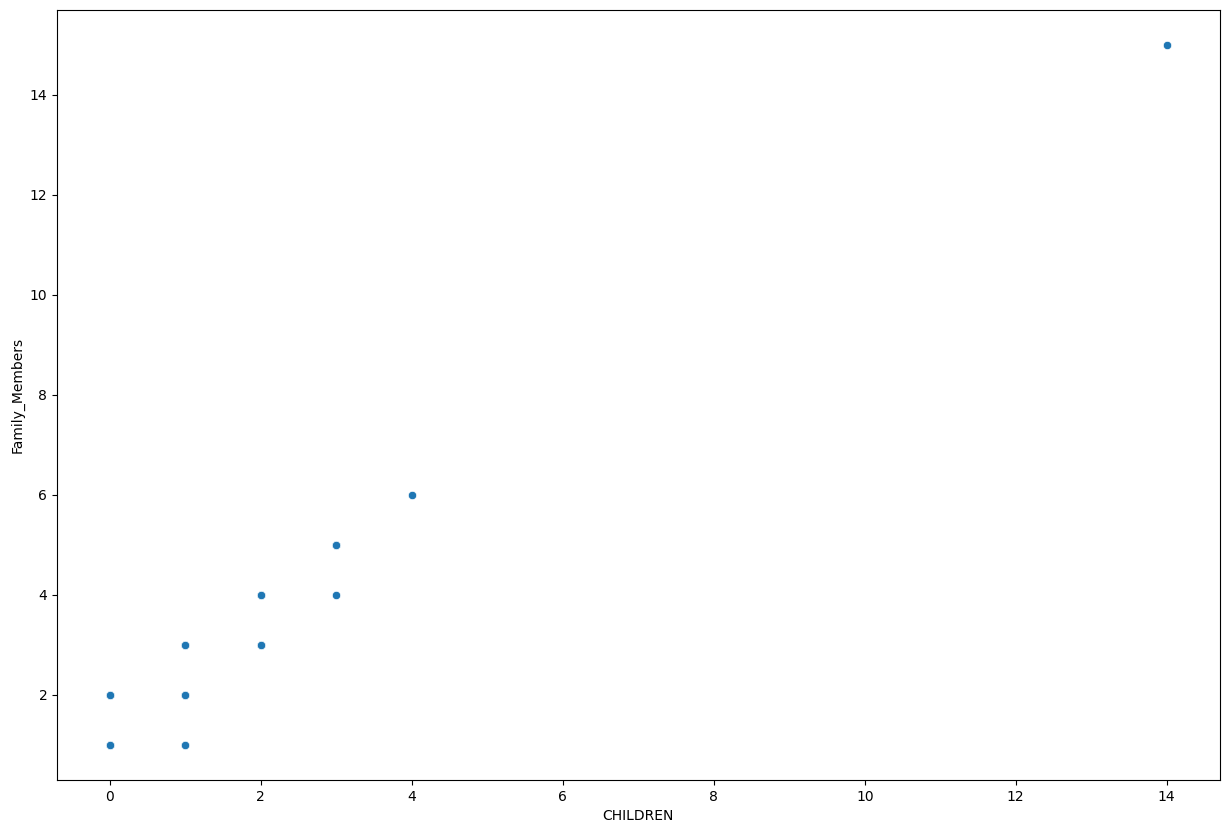

In [51]:
# Relationship between Children and family members
sns.scatterplot(x= df5['CHILDREN'], y=df5['Family_Members'], data=df5) # Scatter plot 

In [52]:
# rows having number of children more than 4
df5[df5['CHILDREN']>4]

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
565,14,225000.0,-17754.0,-1689,15,0,1,1,1,1,2,1,1


It appears rare case of family with 14 childrens. To overcome outlier error and enhance data modeling and accuracy, it is removed from table

In [53]:
#Removing row from dataframe 
df6=df5[~(df5['CHILDREN']>4)]

In [54]:
print('df5:',df5.shape)
print('df6:',df6.shape)

df5: (1496, 13)
df6: (1495, 13)


In [55]:
# Create a new column 'age' from 'birthday_count' column
df6['age']=round(df6['Birthday_count']/365*-1, 0) # converts number of days into years

C:\Users\PATIL\AppData\Local\Temp\ipykernel_1164\338460599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['age']=round(df6['Birthday_count']/365*-1, 0) # converts number of days into years


In [56]:
df6['age'].unique() # distinct ages in column

array([51., 37., 61., 50., 52., 24., 46., 35., 33., 49., 44., 43., 60.,
       55., 29., 36., 56., 58., 65., 53., 64., 42., 30., 32., 26., 28.,
       45., 67., 25., 57., 59., 38., 31., 40., 34., 47., 41., 63., 54.,
       48., 62., 27., 39., 66., 23., 68., 22., 21.])

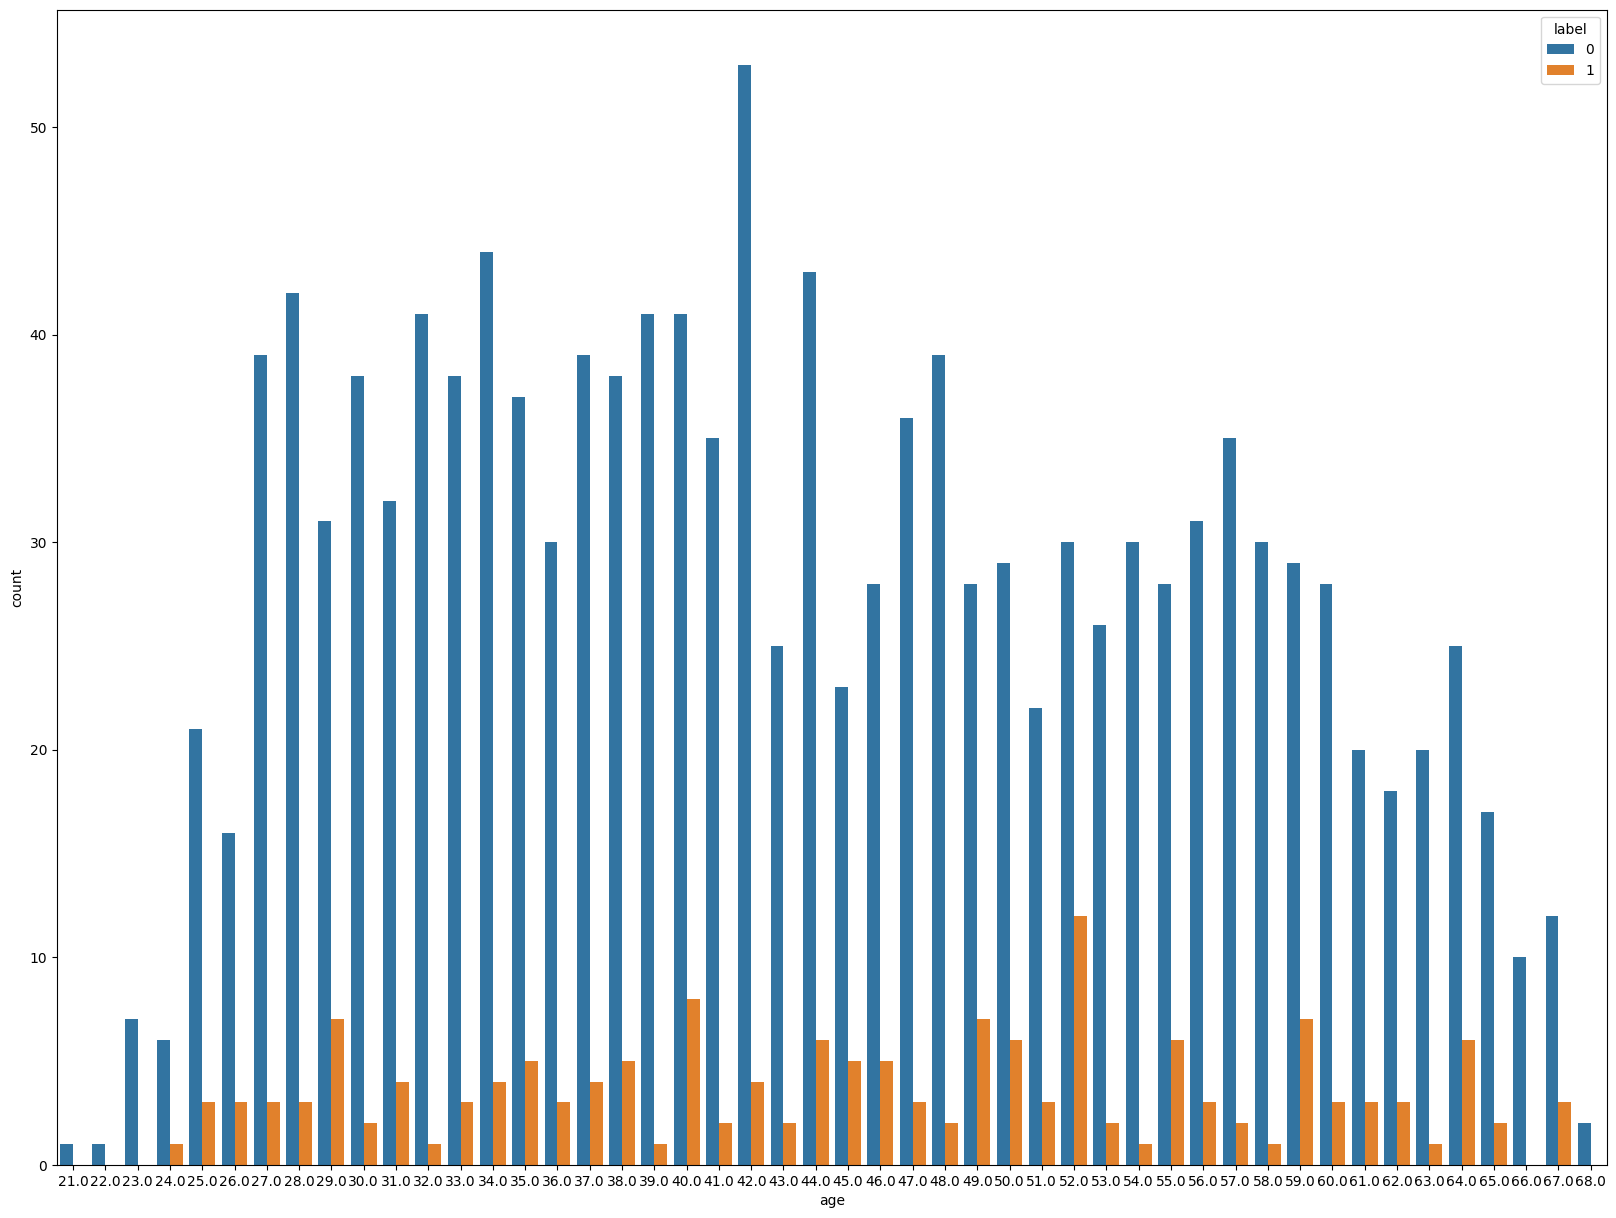

In [57]:
plt.figure(figsize=(20,15))
sns.countplot(x=df6['age'], hue=df6['label'], data=df6)

plt.show()

In [58]:
df6[df6['Employed_days']>0]['Employed_days'].unique()

array([365243], dtype=int64)

In [59]:
exp= round(df6['Employed_days']/365*-1,0)
df6['Experience']=np.where(df6['Employed_days']>0, 0, exp)

C:\Users\PATIL\AppData\Local\Temp\ipykernel_1164\2430326342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Experience']=np.where(df6['Employed_days']>0, 0, exp)


In [60]:
df6['Experience'].unique()

array([ 0.,  2.,  3.,  1.,  7.,  5., 12., 13., 10.,  4., 20.,  6., 11.,
        9., 23.,  8., 14., 19., 22., 21., 17., 26., 24., 15., 16., 34.,
       37., 27., 41., 35., 18., 31., 32., 25., 29., 38., 33., 28., 36.])

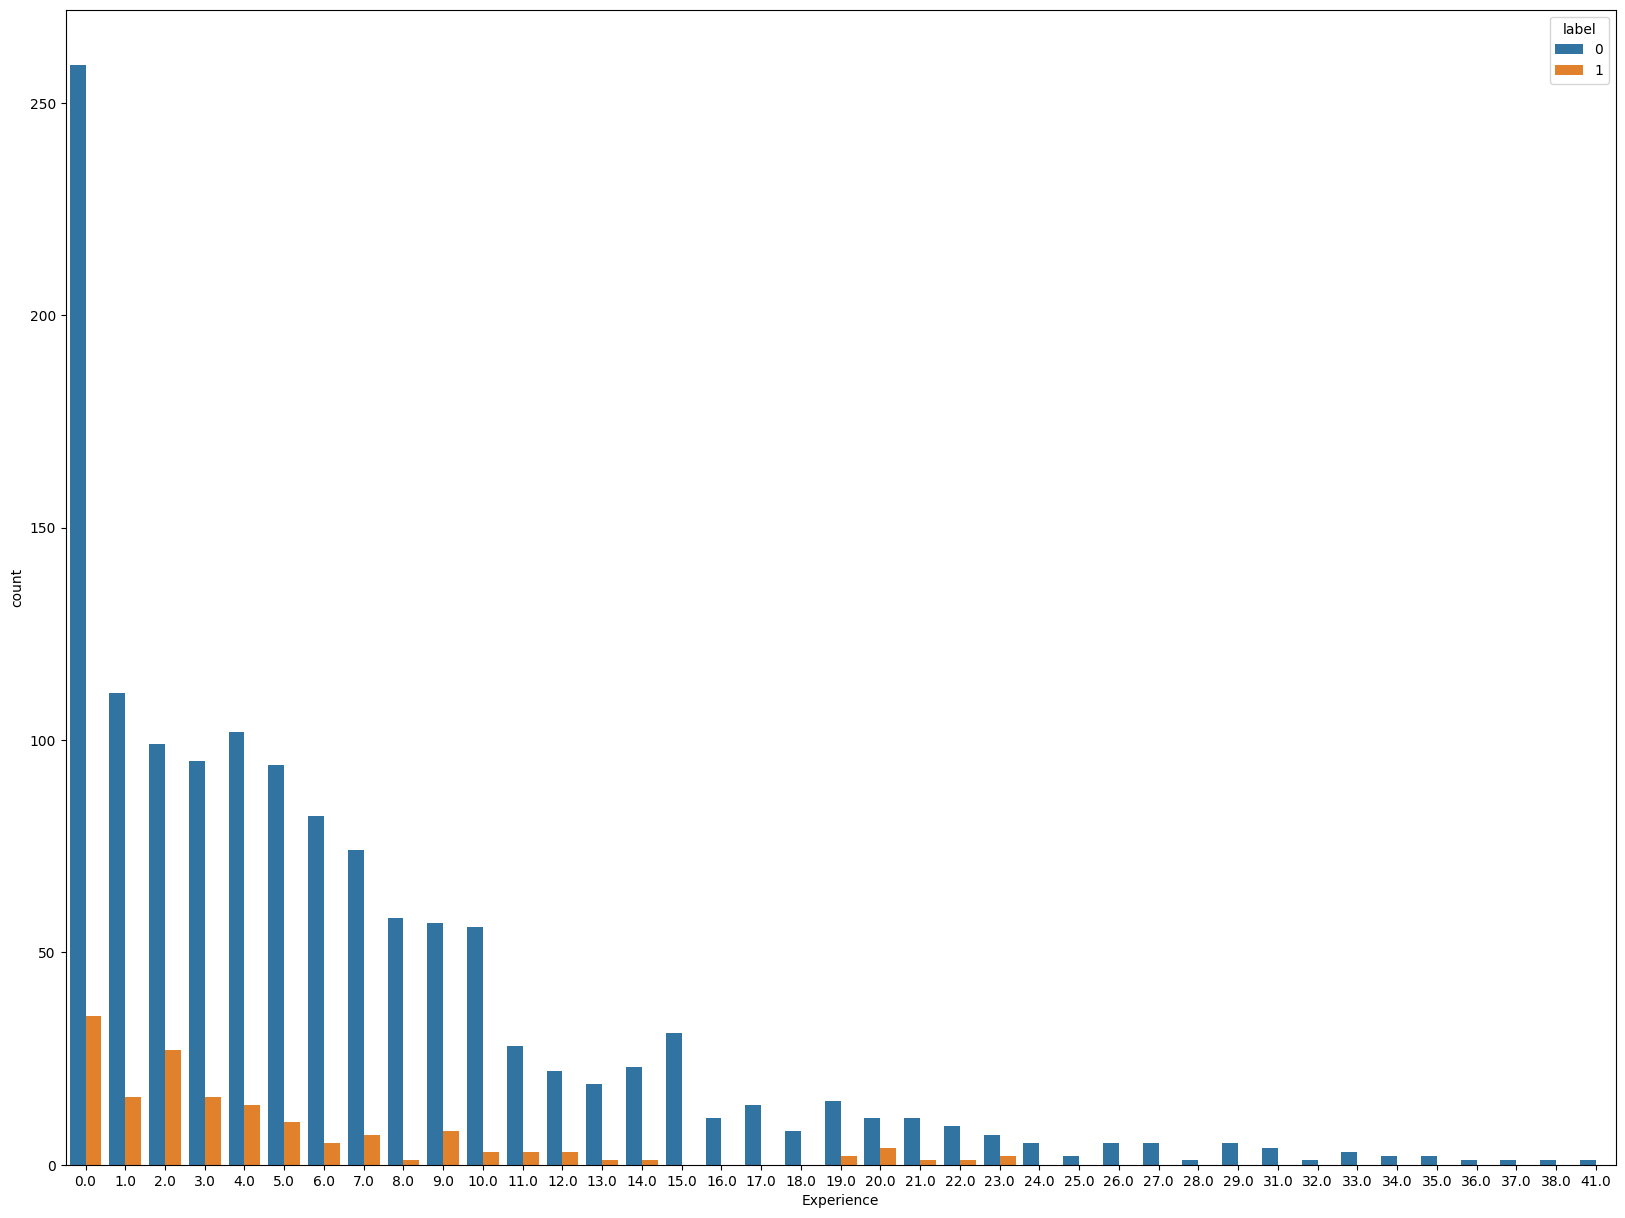

In [61]:
plt.figure(figsize=(20,15))
sns.countplot(x=df6['Experience'], hue=df6['label'], data=df6)

plt.show()

In [62]:
df6.head()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,age,Experience
0,0,180000.0,-18772.0,365243,2,1,1,1,1,0,0,0,1,51.0,0.0
1,0,315000.0,-13557.0,-586,2,1,0,1,0,1,0,0,1,37.0,2.0
4,0,315000.0,-13557.0,-586,2,1,0,1,0,1,0,0,1,37.0,2.0
6,0,315000.0,-13557.0,-586,2,1,0,1,0,1,0,0,1,37.0,2.0
7,0,180000.0,-22134.0,365243,2,1,0,0,0,0,2,0,1,61.0,0.0


In [63]:
df7=df6.copy()
df7.columns

Index(['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days',
       'Family_Members', 'label', 'GENDER', 'Car_Owner', 'Propert_Owner',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'age',
       'Experience'],
      dtype='object')

In [64]:
# removing columns'Birthday_count' and 'Employed_days' from table
df7.drop(['Birthday_count', 'Employed_days'], axis=1, inplace=True)

In [65]:
df7.head()

,CHILDREN,Annual_income,Family_Members,label,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,age,Experience
0,0,180000.0,2,1,1,1,1,0,0,0,1,51.0,0.0
1,0,315000.0,2,1,0,1,0,1,0,0,1,37.0,2.0
4,0,315000.0,2,1,0,1,0,1,0,0,1,37.0,2.0
6,0,315000.0,2,1,0,1,0,1,0,0,1,37.0,2.0
7,0,180000.0,2,1,0,0,0,0,2,0,1,61.0,0.0


In [66]:
cols= ['CHILDREN', 'Annual_income','Family_Members','age','Experience']
@interact
def cat_uniq(col=cols):
    sns.boxplot(df7[col])

interactive(children=(Dropdown(description='col', options=('CHILDREN', 'Annual_income', 'Family_Members', 'age…

In [67]:
cols= ['CHILDREN', 'Annual_income','Family_Members','age','Experience']
@interact
def cat_uniq(col=cols):
    sns.distplot(df7[col]) # Checking the distibution of values in each column

interactive(children=(Dropdown(description='col', options=('CHILDREN', 'Annual_income', 'Family_Members', 'age…

# Data transformation of values to obtain normal distribution 

In [68]:
df8=df7.copy()

C:\Users\PATIL\AppData\Local\Temp\ipykernel_1164\2042166957.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['children_sqrt'])


<Axes: xlabel='children_sqrt', ylabel='Density'>

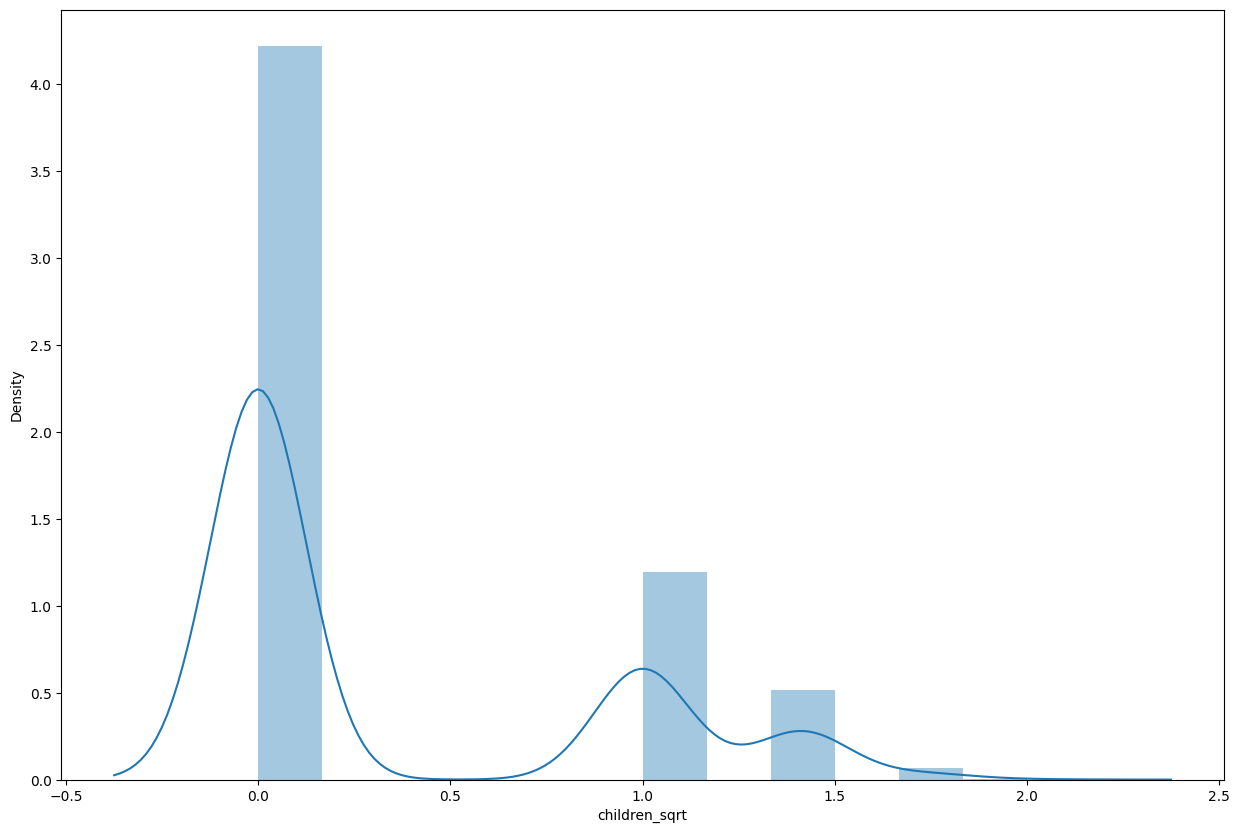

In [69]:
df8['children_sqrt']=np.sqrt(df8['CHILDREN'])
sns.distplot(df8['children_sqrt'])

C:\Users\PATIL\AppData\Local\Temp\ipykernel_1164\1733557578.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['fa_sqrt'])


<Axes: xlabel='fa_sqrt', ylabel='Density'>

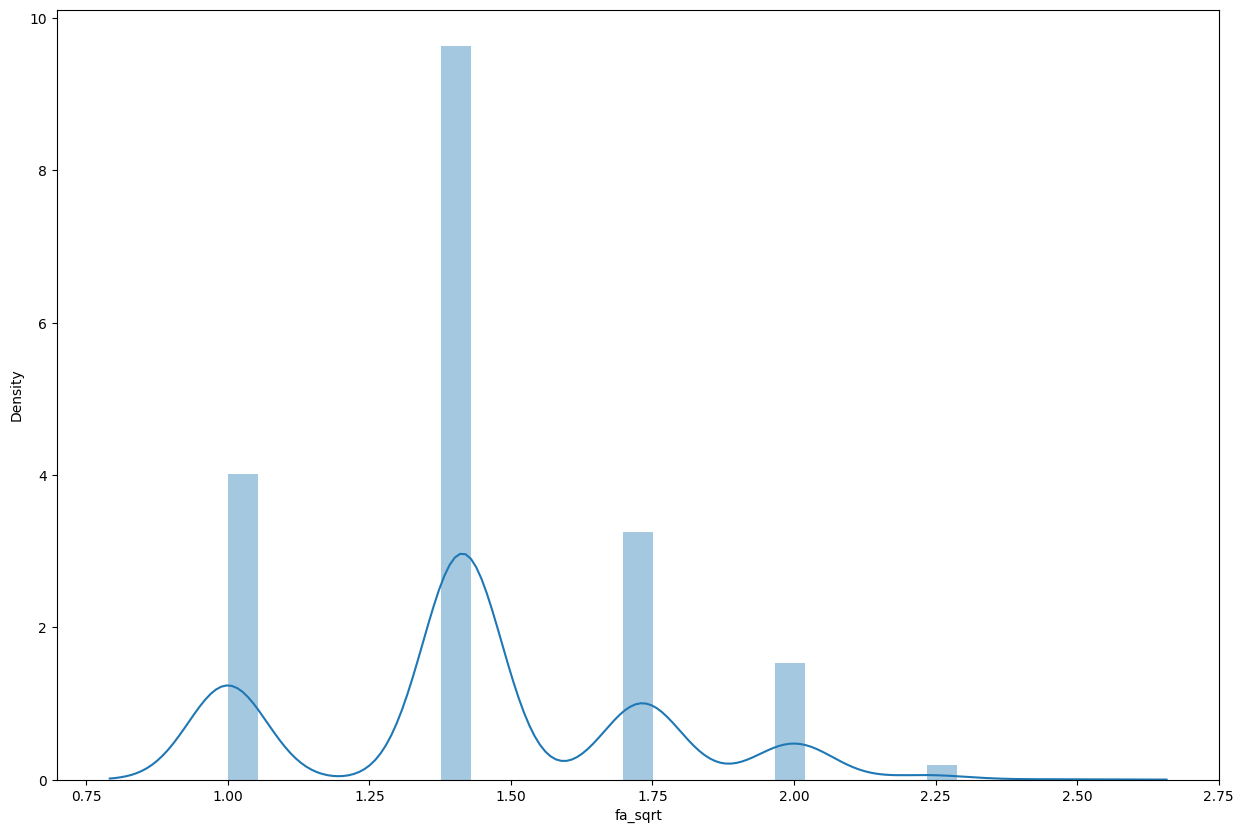

In [70]:
df8['fa_sqrt']=np.sqrt(df8['Family_Members'])
sns.distplot(df8['fa_sqrt'])

In [71]:
# Square root transformation of annual income column for converting to normal distribution of values
df8['Annual_income_sqrt']=np.sqrt(df8['Annual_income'])

C:\Users\PATIL\AppData\Local\Temp\ipykernel_1164\190871777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df8['Annual_income_sqrt'])


<Axes: xlabel='Annual_income_sqrt', ylabel='Density'>

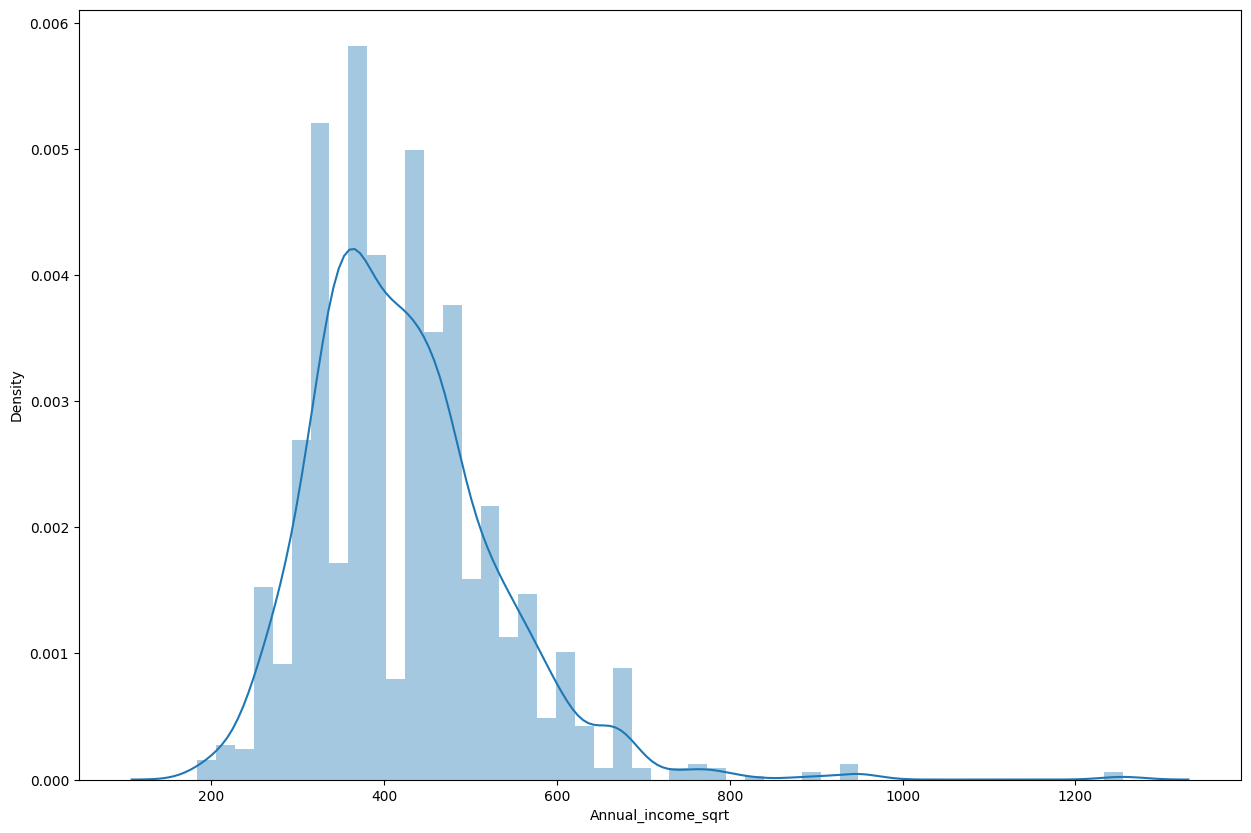

In [72]:
sns.distplot(df8['Annual_income_sqrt'])

In [73]:
df8.head()

,CHILDREN,Annual_income,Family_Members,label,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,age,Experience,children_sqrt,fa_sqrt,Annual_income_sqrt
0,0,180000.0,2,1,1,1,1,0,0,0,1,51.0,0.0,0.0,1.414214,424.264069
1,0,315000.0,2,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
4,0,315000.0,2,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
6,0,315000.0,2,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
7,0,180000.0,2,1,0,0,0,0,2,0,1,61.0,0.0,0.0,1.414214,424.264069


In [74]:
df9=df8.drop(['Annual_income','CHILDREN', 'Family_Members'], axis=1)

In [75]:
df9.head()

,label,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,age,Experience,children_sqrt,fa_sqrt,Annual_income_sqrt
0,1,1,1,1,0,0,0,1,51.0,0.0,0.0,1.414214,424.264069
1,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
4,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
6,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
7,1,0,0,0,0,2,0,1,61.0,0.0,0.0,1.414214,424.264069


In [76]:
cols= ['children_sqrt', 'Annual_income_sqrt','fa_sqrt','age','Experience']
@interact
def cat_uniq(col=cols):
    sns.boxplot(df8[col])

interactive(children=(Dropdown(description='col', options=('children_sqrt', 'Annual_income_sqrt', 'fa_sqrt', '…

In [77]:
def rem_out(df, col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    df[col]=np.where(df[col]>ul,ul, df[col])
    df[col]=np.where(df[col]<ll,ll, df[col])

In [78]:
rem_out(df9,'Annual_income_sqrt')


In [79]:
rem_out(df9,'Experience')

In [80]:
cols= ['children_sqrt', 'Annual_income_sqrt','fa_sqrt','age','Experience']
@interact
def cat_uniq(col=cols):
    sns.boxplot(df9[col])

interactive(children=(Dropdown(description='col', options=('children_sqrt', 'Annual_income_sqrt', 'fa_sqrt', '…

In [81]:
df9.head() # Final dataframe for Model development

,label,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,age,Experience,children_sqrt,fa_sqrt,Annual_income_sqrt
0,1,1,1,1,0,0,0,1,51.0,0.0,0.0,1.414214,424.264069
1,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
4,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
6,1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
7,1,0,0,0,0,2,0,1,61.0,0.0,0.0,1.414214,424.264069


<Axes: >

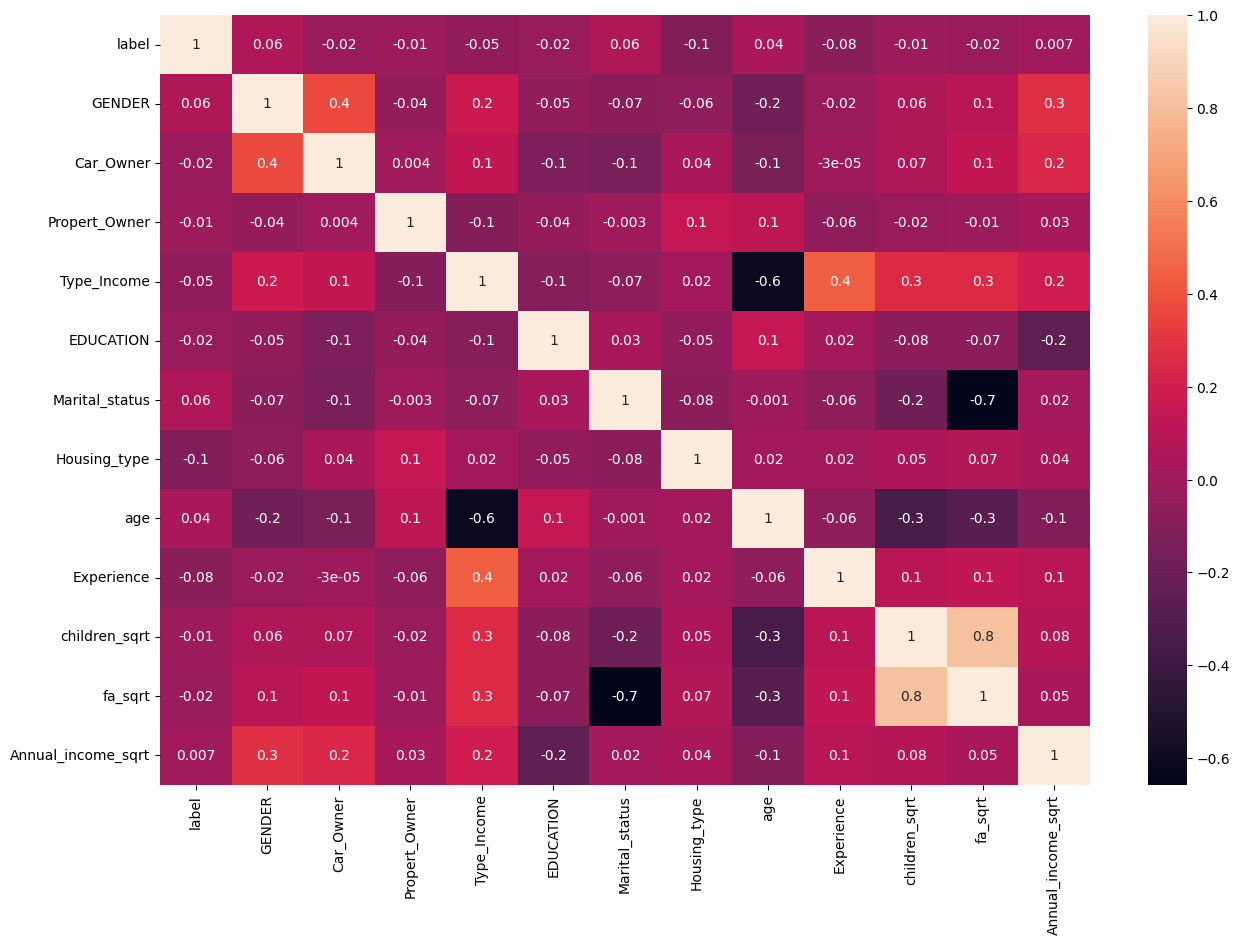

In [82]:
sns.heatmap(df9.corr(), annot=True, fmt='0.1g')

Splitting the features and label

In [83]:
x=df9.drop('label', axis=1)
y=df9['label']

In [84]:
x_train, x_test, y_train, y_test=train_test_split(x, y, stratify= y, test_size=0.25, random_state= 5)

In [85]:
sc= StandardScaler()

In [86]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model selection

1.Comparing the model with default hyperparameters values using Cross validation

In [87]:
#list of models
models =[LogisticRegression(max_iter=10000), RandomForestClassifier(random_state=5), KNeighborsClassifier(), SVC(kernel='linear')]

for model in models:
    cv_score=cross_val_score(model, x_train, y_train, cv=5) # cv - splits data into 5 folds
    mean= round(sum(cv_score)/len(cv_score)*100, 2)
    
    print(model)
    print('cross validation accuracies', cv_score)
    print('accuracy score', mean)
    print('**************************************************************************************')

LogisticRegression(max_iter=10000)
cross validation accuracies [0.88888889 0.89285714 0.875      0.89285714 0.89285714]
accuracy score 88.85
**************************************************************************************
RandomForestClassifier(random_state=5)
cross validation accuracies [0.92       0.94642857 0.92857143 0.91071429 0.91964286]
accuracy score 92.51
**************************************************************************************
KNeighborsClassifier()
cross validation accuracies [0.87555556 0.90625    0.88839286 0.87946429 0.87053571]
accuracy score 88.4
**************************************************************************************
SVC(kernel='linear')
cross validation accuracies [0.89333333 0.89285714 0.89285714 0.89285714 0.89285714]
accuracy score 89.3
**************************************************************************************


 Inference: For Credit card dataset RandomForestClassifier has the highest accuracy value with the default hyperparameters.

2.Comparing the models with different hyperparameter values using 'GridSearchCV'

In [88]:
# models list
model_list =[LogisticRegression(max_iter=10000), RandomForestClassifier(random_state=5), KNeighborsClassifier(), SVC()]

#Creating a dictionary that contains hyperparameter values for above models
hyper_para= { 'lr_hypara': {'C': [1, 5, 10]},'rfc_hypara':{'n_estimators':[20, 50, 100]}, 'kn_hypara':{'n_neighbors':[5, 10]},'svc_hypara':{'kernel':['linear','poly', 'rbf'],'C': [1, 5, 10]}} 


In [89]:
# To get the hyperparameters of models from dict
model_keys=list(hyper_para.keys()) 
a= model_keys[3]
hyper_para[a]

{'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 5, 10]}

# Applying GridSearchCV

loop to iterate over different model with different hyperparameters and applying GridSearchCV to select best hyperparametes

In [90]:

best_result=[]
i=0
for model in model_list:
    key=model_keys[i]
    param=hyper_para[key]
    
    i+= 1
    print(model)
    print(param)
    
    classifier=GridSearchCV(model, param, cv=5)
    
    classifier.fit(x_train, y_train)
    
    best_result.append({'model': model, 'highest_score': classifier.best_score_ , 'best_param': classifier.best_params_ })
    

    

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10]}
RandomForestClassifier(random_state=5)
{'n_estimators': [20, 50, 100]}
KNeighborsClassifier()
{'n_neighbors': [5, 10]}
SVC()
{'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 5, 10]}


In [91]:
best_result

[{'model': LogisticRegression(max_iter=10000),
  'highest_score': 0.8884920634920634,
  'best_param': {'C': 1}},
 {'model': RandomForestClassifier(random_state=5),
  'highest_score': 0.9286349206349206,
  'best_param': {'n_estimators': 50}},
 {'model': KNeighborsClassifier(),
  'highest_score': 0.8902777777777777,
  'best_param': {'n_neighbors': 10}},
 {'model': SVC(),
  'highest_score': 0.8929563492063493,
  'best_param': {'C': 5, 'kernel': 'rbf'}}]

In [92]:
best_df=pd.DataFrame(best_result)
best_df # Table of models and their respective highest score and best hyperparameters

,model,highest_score,best_param
0,LogisticRegression(max_iter=10000),0.888492,{'C': 1}
1,RandomForestClassifier(random_state=5),0.928635,{'n_estimators': 50}
2,KNeighborsClassifier(),0.890278,{'n_neighbors': 10}
3,SVC(),0.892956,"{'C': 5, 'kernel': 'rbf'}"


 Best model is RandomForestClassifier and n_estimators is 20 with highest score of 92 among all models

# RandomForestClassifier

In [93]:
# Model development
rfc=RandomForestClassifier(random_state=5, n_estimators=50)

In [94]:
#fitting tha data into model
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=5)

In [95]:
# predicting the labels using testing set of features
prediction = rfc.predict(x_test)

Accuracy of model during Training and Testing

In [96]:
cv_score=cross_val_score(rfc, x_train, y_train, cv=5)
print("Model_Accuracy")
print('Training_accuracy:',rfc.score(x_train, y_train))
print('cross_validation_accuracy:',cv_score.mean())
print('Testing_accuracy:', accuracy_score(y_test, prediction))


Model_Accuracy
Training_accuracy: 0.9973238180196253
cross_validation_accuracy: 0.9286349206349206
Testing_accuracy: 0.9197860962566845


In [97]:
print('RandomForestClassifier classification_report')
print('-------------------------------------')
print(classification_report(y_test, prediction))

RandomForestClassifier classification_report
-------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       334
           1       0.75      0.38      0.50        40

    accuracy                           0.92       374
   macro avg       0.84      0.68      0.73       374
weighted avg       0.91      0.92      0.91       374



RandomForestClassifier confusion_matrix
-------------------------------------
[[329   5]
 [ 25  15]]


Text(158.22222222222223, 0.5, 'y_test')

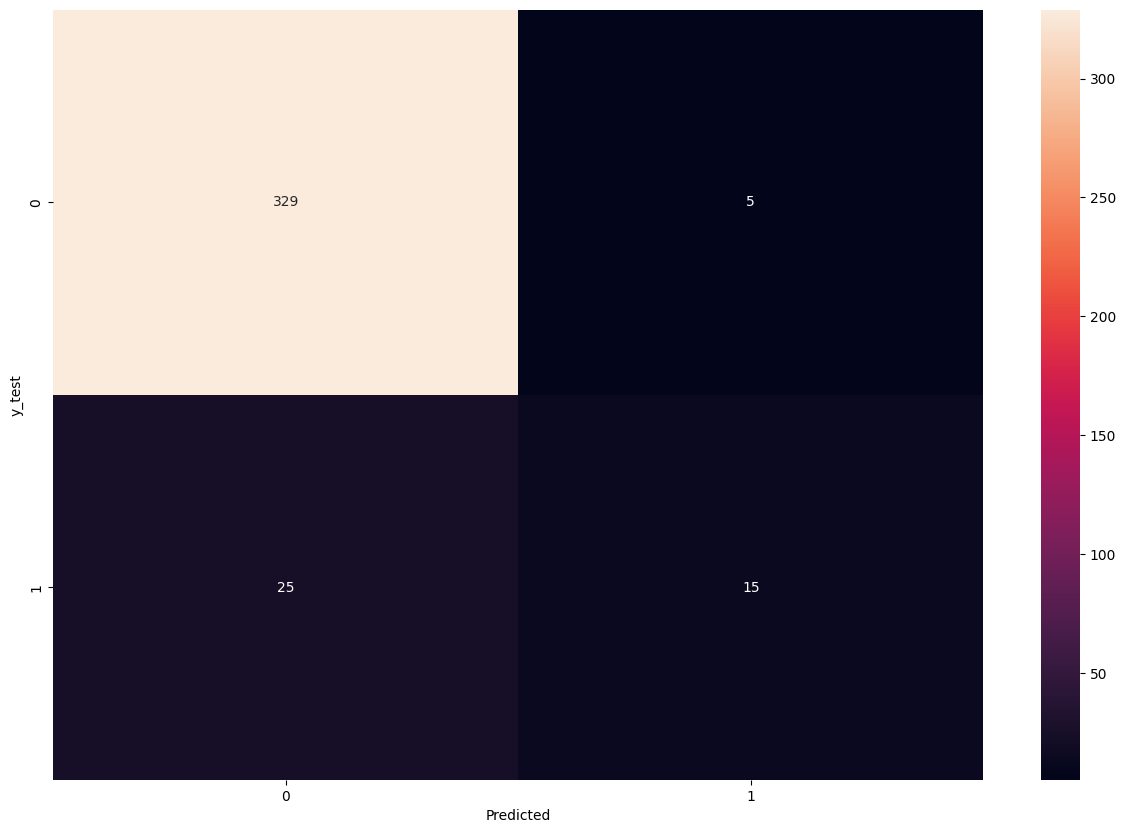

In [98]:
print('RandomForestClassifier confusion_matrix')
print('-------------------------------------')
cm= confusion_matrix(y_test, prediction)
print(cm)


sns.heatmap(cm, annot=True, fmt='0.3g')
plt.xlabel('Predicted')
plt.ylabel('y_test')

for above given prediction model predicted 0 as 


In [99]:
x.head()

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,age,Experience,children_sqrt,fa_sqrt,Annual_income_sqrt
0,1,1,1,0,0,0,1,51.0,0.0,0.0,1.414214,424.264069
1,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
4,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
6,0,1,0,1,0,0,1,37.0,2.0,0.0,1.414214,561.248608
7,0,0,0,0,2,0,1,61.0,0.0,0.0,1.414214,424.264069


In [100]:
@interact
def cat_uniq(col=list(x.columns)):
    print(x[col].value_counts())

interactive(children=(Dropdown(description='col', options=('GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Incom…

In [101]:
@interact
def cat_uniq(col=list(df4_cat1.columns)):
    print(df4_cat1[col].value_counts())

interactive(children=(Dropdown(description='col', options=('GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Incom…

In [102]:
colms= x.columns

In [103]:
# list of all the features with their encoded numbers
Details=['No_of Children =','No_of family members =', 'Gender: Female- 0, Male- 1 =', 'Car_owner: No-0, Yes-1 =','Property_owner:No-0,Yes-1 =','Type_Income: Working-1, Pensioner-0 =', 'Education:Lower Secondary-0, Degree-1, Secondary-2=','Martial status:Married-0, Single(married)-1,Singele(Not married)-2 =','Housing type: No-Own house-0, Own house-1 =', 'Age =', 'Experience(years) =']

# User input to predict Credit card approval

In [104]:
import math
colms= x.columns
print('Enter details to check credit card availability')
Criteria={}
a =1

# iterate over all features to collect input from user
for i in Details:
      print('-----------------------------------------------------')
      user_input=int(input(f'{a}.{i} :' ) )
      a +=1
      Criteria[colms[a-2]]=user_input # it adds user input to "Criteria" dictionary
      
user_input1=math.sqrt(int(input(f'{a}. annual income:' )))
Criteria[colms[a-1]] = user_input1


print('*************************************************************')
print(Criteria)

Enter details to check credit card availability
-----------------------------------------------------
1.No_of Children = :2
-----------------------------------------------------
2.No_of family members = :4
-----------------------------------------------------
3.Gender: Female- 0, Male- 1 = :0
-----------------------------------------------------
4.Car_owner: No-0, Yes-1 = :0
-----------------------------------------------------
5.Property_owner:No-0,Yes-1 = :0
-----------------------------------------------------
6.Type_Income: Working-1, Pensioner-0 = :0
-----------------------------------------------------
7.Education:Lower Secondary-0, Degree-1, Secondary-2= :0
-----------------------------------------------------
8.Martial status:Married-0, Single(married)-1,Singele(Not married)-2 = :0
-----------------------------------------------------
9.Housing type: No-Own house-0, Own house-1 = :1
-----------------------------------------------------
10.Age = :27
-----------------------------

In [106]:
# convertiong dictionary to DataFrame
Criteria_df=pd.DataFrame([Criteria]) 
z= Criteria_df
print(z)
print('****************************************************************')

# scaling features using standard scaler
z=sc.fit_transform(z)

# predicting the Credit card approval
pred = rfc.predict(z)
print('prediction:', pred)
print('-----------------------------------------------------------------')

if pred == 0:
    print("'Sorry', For this customer credit card is not approved ")
else:
    print(" 'Good', You can approve a credit card to this customer")

   GENDER  Car_Owner  Propert_Owner  Type_Income  EDUCATION  Marital_status  \
0       2          4              0            0          0               0   

   Housing_type  age  Experience  children_sqrt  fa_sqrt  Annual_income_sqrt  
0             0    0           1             27        4          447.213595  
****************************************************************
prediction: [0]
-----------------------------------------------------------------
'Sorry', For this customer credit card is not approved 


# Conclusion

This project aims to develop a machine learning model to predict credit card approval with high accuracy. The model will be trained on a dataset of customer information and credit card approval decisions. The model will be used to improve the bank's credit card approval process by identifying applicants who are more likely to be approved.

The proposed approach is important because it can help banks to make more informed decisions about credit card applications. This can lead to a reduction in credit card fraud and a decrease in the number of bad debts. The proposed approach can also be used to develop targeted marketing campaigns for credit cards.

The proposed approach is feasible because the data required to train the model is available from banks. The data can be collected from credit card applications and credit bureau reports. The data can be cleaned and prepared using standard data science techniques.

The proposed approach is beneficial because it can help banks to improve their credit card approval process and reduce credit card fraud. The proposed approach can also be used to develop targeted marketing campaigns for credit cards.